# Art - CMPINF0010 Final Project Notebook

Importing the dataset from the WPRDC:

In [8]:
import pandas as pd
import numpy as np
import geopandas
import math
%matplotlib inline
import matplotlib.pyplot as plt

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

pittsburgh_public_art_data = pd.read_csv("WPRDCPublicArtData.csv")

pittsburgh_public_art_data.head(10) #preview of the data unfiltered yet

,id,name,title,artist_name,art_type,park,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,812728309,1001,Oakwood Road Monument,NaN,NaN,NaN,NaN,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429192,-80.066225
1,188255168,1002,Rooster Waiting For The Streetcar,James Simon,Modern and Contemporary Art,NaN,NaN,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.442926,-80.039711
2,2032091917,129,Middle East Memorial Plaque,NaN,War Memorials,NaN,NaN,Central Business District,6.0,1.0,4.200302e+10,6.0,1.0,2.0,1-4,40.438092,-79.996852
3,1447629273,143,L'Enfant,Paul Roger-Bloche,Historic Art,NaN,NaN,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,40.388748,-79.986497
4,1935017944,148,Veterans Memorial (Brookline),NaN,War Memorials,Brookline Monument,NaN,Brookline,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-26,40.391721,-80.016981
5,752311791,153,Oakley Street Mosaic Steps,Laura Jean McLaughlin,Modern and Contemporary Art,NaN,NaN,South Side Slopes,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.423580,-79.968693
6,915929762,156,Windows of Light,Jane Haskell,Modern and Contemporary Art,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,275033545,157,Time Travelers,Edith Abeyta & Sandy Kessler Kaminski,Modern and Contemporary Art,NaN,NaN,Hazelwood,5.0,15.0,4.200356e+10,3.0,15.0,4.0,2-13,40.406833,-79.944514
8,687548560,159,Untitled (Ben Grubb),Ben Grubb,Modern and Contemporary Art,Highland Park,NaN,Highland Park,7.0,11.0,4.200398e+10,2.0,11.0,5.0,3-9,40.481455,-79.911319
9,1980433881,161,Caves,Randi Stewart,Modern and Contemporary Art,Frick Park,NaN,Squirrel Hill South,5.0,14.0,4.200398e+10,3.0,14.0,4.0,2-21,40.429959,-79.914858


Counting how many public art pieces are in each neighborhood:

In [9]:
pub_art_dict = {}

neighborhoodname = 0
for index, row in pittsburgh_public_art_data.iterrows():
    neighborhoodname = row['neighborhood']
    if neighborhoodname in pub_art_dict:
        pub_art_dict[neighborhoodname] += 1
    else:
        pub_art_dict[neighborhoodname] = 1

print(pub_art_dict)

{'Oakwood': 1, 'Elliott': 3, 'Central Business District': 27, 'Carrick': 2, 'Brookline': 2, 'South Side Slopes': 3, nan: 2, 'Hazelwood': 3, 'Highland Park': 10, 'Squirrel Hill South': 20, 'Perry North': 2, 'Beltzhoover': 3, 'Spring Hill-City View': 4, 'West End': 2, 'Greenfield': 3, 'Shadyside': 6, 'East Allegheny': 2, 'Squirrel Hill North': 2, 'Beechview': 7, 'Crawford-Roberts': 3, 'Lincoln-Lemington-Belmar': 2, 'Hays': 1, 'Allegheny Center': 18, 'North Oakland': 1, 'South Side Flats': 9, 'Central Oakland': 5, 'Point Breeze': 3, 'Allegheny West': 1, 'Strip District': 2, 'Mount Washington': 2, 'Brighton Heights': 5, 'Perry South': 1, 'North Shore': 8, 'Upper Hill': 2, 'Garfield': 2, 'Central Lawrenceville': 2, 'Upper Lawrenceville': 1, 'Stanton Heights': 1, 'Duquesne Heights': 3, 'Allentown': 2, 'East Liberty': 1, 'Bloomfield': 1, 'East Carnegie': 1, 'East Hills': 1, 'Lower Lawrenceville': 5, 'Overbrook': 1, 'Polish Hill': 1, 'Regent Square': 1, 'Sheraden': 1, 'Spring Garden': 2, 'Swis

Making the data easier to read:

In [10]:
pub_art_series = pd.Series(pub_art_dict)
pub_art_series.sort_values()

Oakwood                       1
Knoxville                     1
Perry South                   1
Upper Lawrenceville           1
Stanton Heights               1
East Liberty                  1
Bloomfield                    1
East Carnegie                 1
North Oakland                 1
East Hills                    1
Polish Hill                   1
Regent Square                 1
Sheraden                      1
Swisshelm Park                1
Troy Hill                     1
Crafton Heights               1
Esplen                        1
Overbrook                     1
Hays                          1
Allegheny West                1
Manchester                    1
Carrick                       2
Brookline                     2
Spring Garden                 2
NaN                           2
Perry North                   2
Allentown                     2
Central Lawrenceville         2
Garfield                      2
Upper Hill                    2
Lincoln-Lemington-Belmar      2
West End

Still not visualized that well. Trying a graph instead:

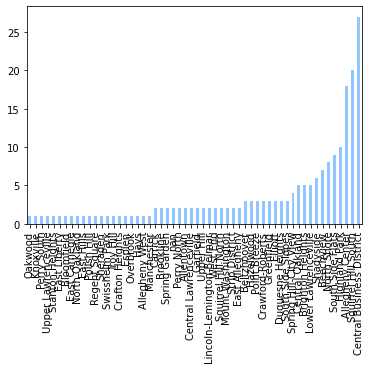

In [20]:
plt.style.use('seaborn-pastel')
pub_art_series.sort_values().plot.bar()

Making it easier to read:

Text(0.5, 0, 'Total Number of Public Art Pieces')

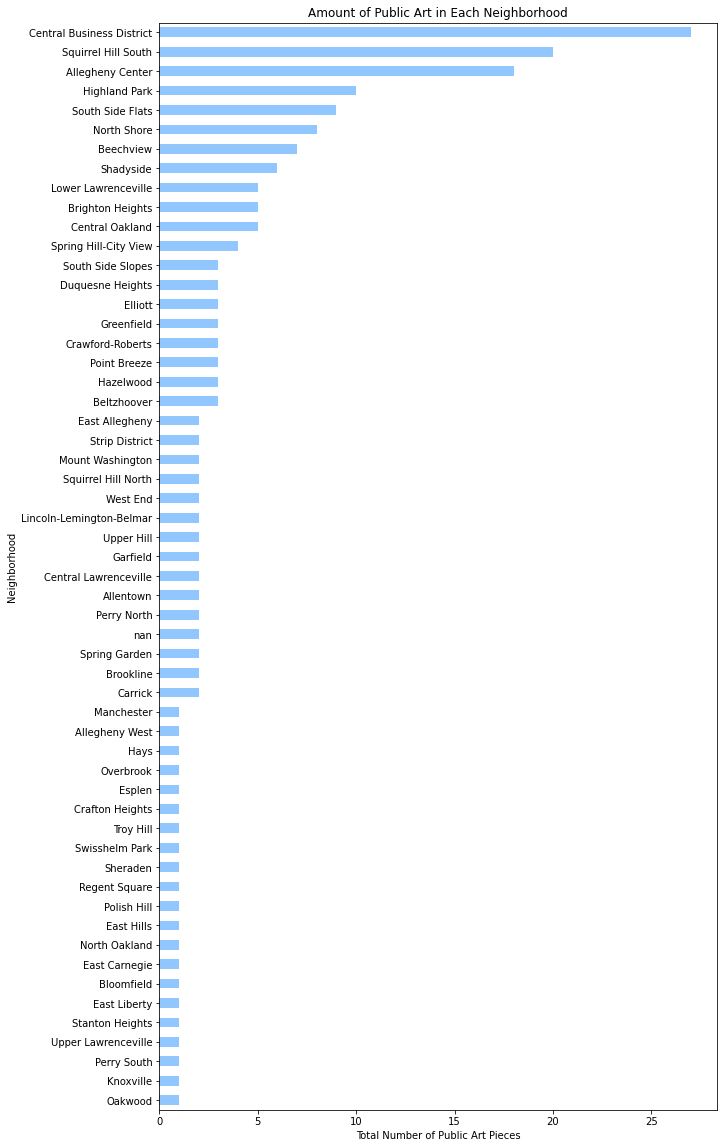

In [12]:
sorted_pub_art_series = pub_art_series.sort_values()

pubart_chart = sorted_pub_art_series.plot.barh(figsize=(10, 20)) 

plt.title('Amount of Public Art in Each Neighborhood')
plt.ylabel('Neighborhood')
plt.xlabel('Total Number of Public Art Pieces')

Easier on the eyes, but all of those neighborhoods don't need to be looked at. Only the top 10 really matter:

Text(0.5, 0, 'Total Number of Public Art Pieces')

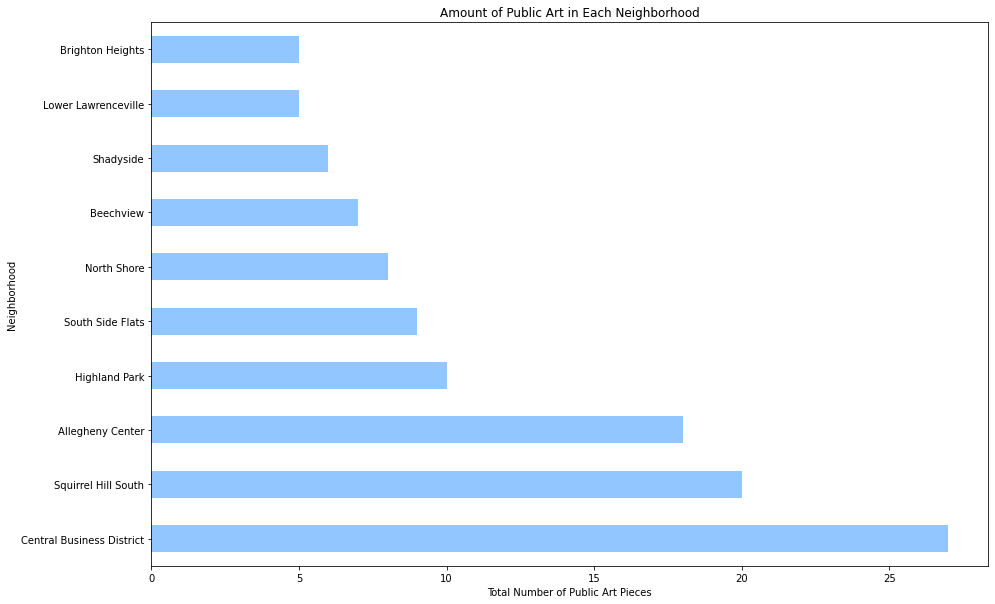

In [17]:
sorted_pub_art_series.sort_values(ascending = False)[:10].plot.barh(figsize=(15, 10))

plt.title('Amount of Public Art in Each Neighborhood')
plt.ylabel('Neighborhood')
plt.xlabel('Total Number of Public Art Pieces')

From the looks of this graph, Central Business District has the most public art pieces.

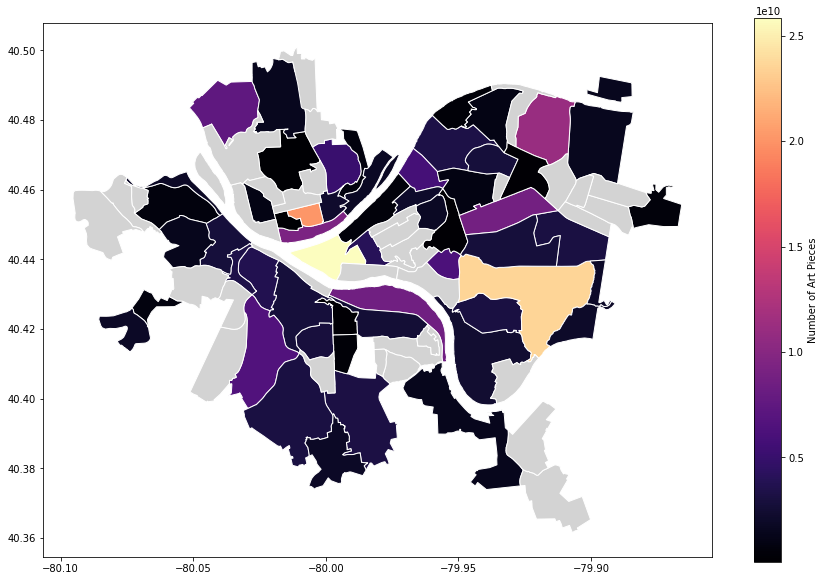

In [14]:
num_art_perneigh = pittsburgh_public_art_data.groupby("neighborhood").sum(['id'])
artpubmap = neighborhoods.merge(num_art_perneigh, 
                                how='left', 
                                left_on='hood', 
                                right_on='neighborhood')

artpubmap.plot(column='id',cmap='magma',              
               edgecolor="white",        
               legend=True,           
               legend_kwds={'label': "Number of Art Pieces"},
               figsize=(15, 10),       
               missing_kwds={"color": "lightgrey"})

Although just because a neighborhood has some art pieces, that solely doesn't decide how good it is.

In [15]:
pubartweighed = {}

borhoodweighed = 0
kindaart = 0
for index, row in pittsburgh_public_art_data.iterrows():
    borhoodweighed = row['neighborhood']
    kindaart = row['art_type']
    if borhoodweighed in pubartweighed:
        if kindaart == "Historic Art":
            pubartweighed[borhoodweighed] += 4
        elif kindaart == "Individual and Historic Monuments":
            pubartweighed[borhoodweighed] += 3
        elif kindaart == "Modern and Contemporary Art":
            pubartweighed[borhoodweighed] += 5
        elif kindaart == "War Memorials":
            pubartweighed[borhoodweighed] += 2
        else:
            pubartweighed[borhoodweighed] += 1
    else:
        if kindaart == "Historic Art":
            pubartweighed[borhoodweighed] = 4
        elif kindaart == "Individual and Historic Monuments":
            pubartweighed[borhoodweighed] = 3
        elif kindaart == "Modern and Contemporary Art":
            pubartweighed[borhoodweighed] = 5
        elif kindaart == "War Memorials":
            pubartweighed[borhoodweighed] = 2
        else:
            pubartweighed[borhoodweighed] = 1

print(pubartweighed)

{'Oakwood': 1, 'Elliott': 12, 'Central Business District': 90, 'Carrick': 6, 'Brookline': 5, 'South Side Slopes': 8, nan: 8, 'Hazelwood': 15, 'Highland Park': 41, 'Squirrel Hill South': 65, 'Perry North': 10, 'Beltzhoover': 9, 'Spring Hill-City View': 11, 'West End': 7, 'Greenfield': 10, 'Shadyside': 28, 'East Allegheny': 10, 'Squirrel Hill North': 2, 'Beechview': 12, 'Crawford-Roberts': 13, 'Lincoln-Lemington-Belmar': 10, 'Hays': 2, 'Allegheny Center': 62, 'North Oakland': 3, 'South Side Flats': 27, 'Central Oakland': 11, 'Point Breeze': 13, 'Allegheny West': 5, 'Strip District': 7, 'Mount Washington': 7, 'Brighton Heights': 13, 'Perry South': 5, 'North Shore': 34, 'Upper Hill': 7, 'Garfield': 6, 'Central Lawrenceville': 7, 'Upper Lawrenceville': 5, 'Stanton Heights': 5, 'Duquesne Heights': 7, 'Allentown': 10, 'East Liberty': 5, 'Bloomfield': 2, 'East Carnegie': 2, 'East Hills': 2, 'Lower Lawrenceville': 13, 'Overbrook': 2, 'Polish Hill': 2, 'Regent Square': 2, 'Sheraden': 2, 'Spring 

Now lets make it readable:

Text(0.5, 0, 'Good Art')

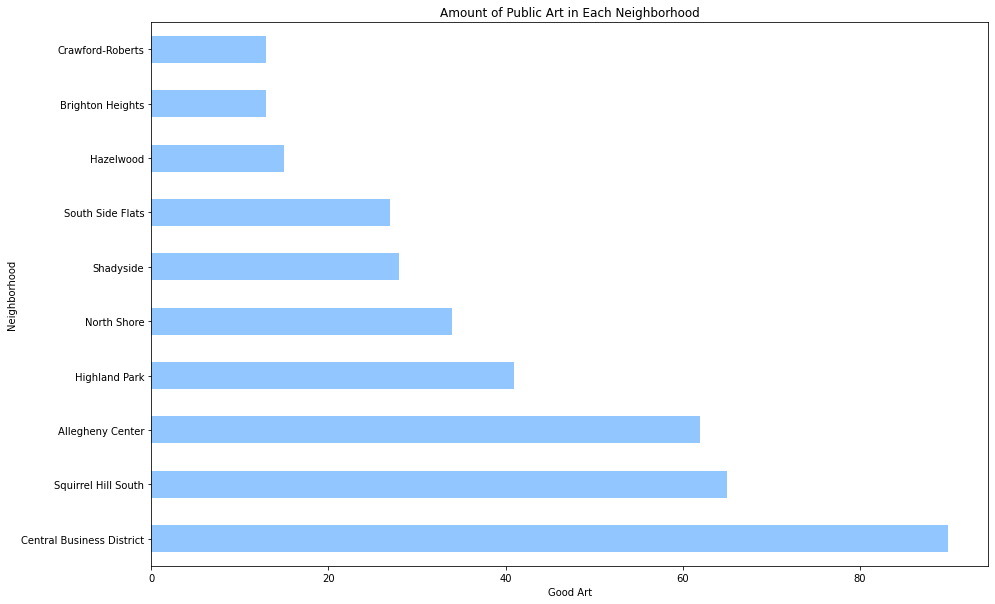

In [22]:
pubartweighed_series = pd.Series(pubartweighed)
sorted_pubartweighed_series = pubartweighed_series.sort_values()

sorted_pubartweighed_series.sort_values(ascending = False)[:10].plot.barh(figsize=(15, 10))

plt.title('Amount of Public Art in Each Neighborhood')
plt.ylabel('Neighborhood')
plt.xlabel('Good Art')

Map version:

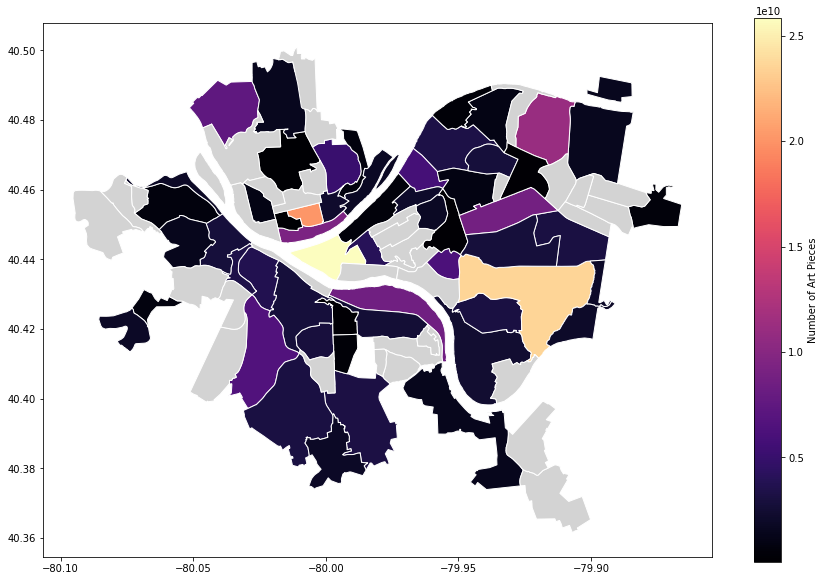

In [23]:
num_art_perneighwei = pittsburgh_public_art_data.groupby("neighborhood").sum(['id'])
artpubweimap = neighborhoods.merge(num_art_perneighwei, 
                                how='left', 
                                left_on='hood', 
                                right_on='neighborhood')

artpubweimap.plot(column='id',cmap='magma',              
               edgecolor="white",        
               legend=True,           
               legend_kwds={'label': "Number of Art Pieces"},
               figsize=(15, 10),       
               missing_kwds={"color": "lightgrey"})

### Conclusion